In [31]:
from soo_remap import *

In [32]:
import sys

import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
import pygsp as pg

In [33]:
graph1 = pg.graphs.Graph(np.asarray([[1,2,3],[4,5,6],[7,8,9]]))


2022-02-01 15:32:35,142:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are self-loops (non-zeros on the diagonal). The Laplacian will not see them.


In [34]:
graph2 = pg.graphs.SphereIcosahedral(16)

In [35]:
path = "/Users/sookim/Desktop/ALBEDO/aibedo/scripts/data/ours/rsut_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"

In [49]:
ds = xr.open_dataset(path)
src_ds=ds
print(np.shape(src_ds.to_array()))

(4, 1980, 192, 288, 2)


In [37]:
graph1 = pg.graphs.Graph(src_ds)

2022-02-01 15:32:37,210:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are self-loops (non-zeros on the diagonal). The Laplacian will not see them.


In [58]:
graph2.coords

TrackedArray([[ 0.        , -0.52573111,  0.85065081],
              [ 0.        , -0.52573111, -0.85065081],
              [ 0.        ,  0.52573111,  0.85065081],
              ...,
              [ 0.94161806, -0.33414006,  0.04130198],
              [ 0.87934451, -0.46088161,  0.11975549],
              [ 0.91609203, -0.40096808,  0.        ]])

In [25]:
graph2.n_vertices

2562

In [50]:
graph2

SphereIcosahedral(n_vertices=2562, n_edges=13620, subdivisions=16, dual=False, standardize=False, metric=euclidean, order=2, kind=knn, k=10, kernel=gaussian, kernel_width=9.88e-02, backend=scipy-ckdtree)

In [51]:
graph2.e

2022-02-01 15:51:00,701:[WARNING](pygsp.graphs.graph._check_fourier_properties): The eigenvalues vector G.e is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


array([0.        , 0.02248903, 0.02255133, ..., 7.60511054, 7.60518873,
       7.60524288])

In [53]:
graph2.n_vertices

2562

In [54]:
graph2


SphereIcosahedral(n_vertices=2562, n_edges=13620, subdivisions=16, dual=False, standardize=False, metric=euclidean, order=2, kind=knn, k=10, kernel=gaussian, kernel_width=9.88e-02, backend=scipy-ckdtree)

In [59]:
coord = graph2.coords

In [66]:
graph = graph2
radius = 1

def xyz2lonlat(x,y,z, radius=6371.0e6):
    """From cartesian geocentric coordinates to 2D geographic coordinates."""
    latitude = np.arcsin(z / radius)/np.pi*180
    longitude = np.arctan2(y, x)/np.pi*180
    return longitude, latitude 

# Hack to get HEALPix true vertices (quadrilateral polygons).
import healpy as hp
npix = graph.n_vertices
nside = np.sqrt(npix/12)
step = 8  # number of vertices per edge (edges are not geodesics)
vertices = graph2.coords
print(np.shape(vertices))
list_polygons_lonlat = []
lon = []
lat = []
for tmp_xyz in vertices:
    tmp_lon, tmp_lat = xyz2lonlat(tmp_xyz[0],tmp_xyz[1],tmp_xyz[2], radius=radius)
    lon.append(tmp_lon)
    lat.append(tmp_lat)

(2562, 3)


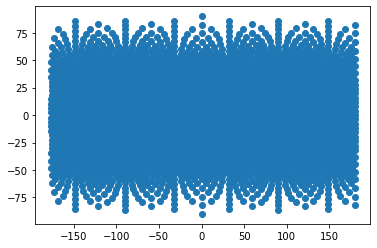

In [67]:

plt.scatter(lon,lat)
